In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from matplotlib.pyplot import cm

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [6]:
'''DATA PRE-PROCESS'''


df = pd.read_csv("WineQT.csv")
#drop the un-related row that marked the id of the wine
dfy = df['quality']
#drop the un-related and target rows
dfX = df.drop(columns = ["Id","quality"])

oversampler = RandomOverSampler(random_state = 42,sampling_strategy = {3:350,4:370,7:420})

def max_abs_scale(df):
    # copy the dataframe
    df_scaled = df.copy()
    # apply maximum absolute scaling
    for column in df_scaled.columns:
        df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
    return df_scaled

#normalize the data based on the maximum absolute value scaling
dfX = max_abs_scale(dfX)

X_resampled, y_resampled = oversampler.fit_resample(dfX, dfy)

#convert pandas dataframe to numpy array
X = X_resampled.to_numpy()
y = y_resampled.to_numpy()

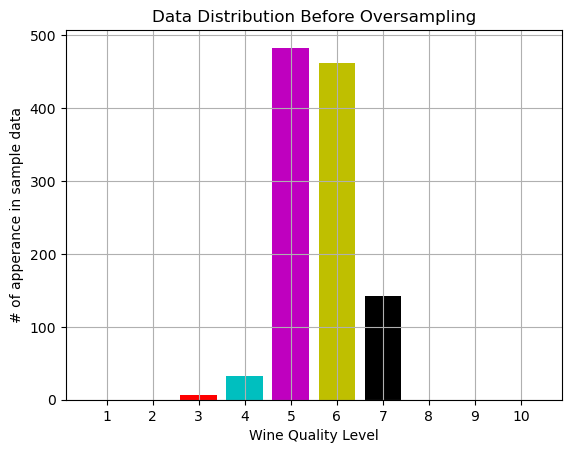

In [7]:
#bar diagram of sample distribution before resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in dfy.to_numpy():
        if j == i:
            count += 1
    y_axis.append(count)
    
colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution Before Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

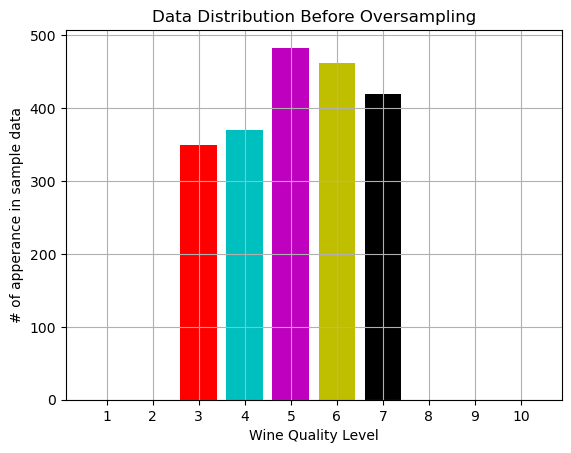

In [8]:
#bar diagram of sample distribution after resample
x_axis = [str(x) for x in range(1,11)]
y_axis = []
for i in range(1,11):
    count = 0
    for j in y:
        if j == i:
            count += 1
    y_axis.append(count)

colorstring = 'bgrcmykw'
colors = ['b','g','r','c','m','y','k','w']

plt.bar(x_axis,y_axis, color = colors)
plt.title('Data Distribution Before Oversampling')
plt.xlabel('Wine Quality Level')
plt.ylabel("# of apperance in sample data")
plt.grid(True)
plt.show()

In [9]:
#split training, validation, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y,   
    test_size = 0.07, random_state=10, shuffle=True
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, 
    test_size = 0.07, random_state=10, shuffle=True
)

In [10]:
def linear(X, y, deg = 1):
    model = LinearRegression()
    poly = PolynomialFeatures(degree = deg)
    X_train_transformed = poly.fit_transform(X_train)
    model.fit(X_train_transformed, y_train) 
    X_trans = poly.fit_transform(X)
    y_pred = model.predict(X_trans)
    val_score = model.score(X_trans, y)
    print('val-score: ', val_score)
    return val_score
    

In [11]:
degree_train = []
degree_val = []

In [12]:
print("Training Score")
lin_1_train = linear(X_train, y_train)
print("Validation Score")
lin_1_val = linear(X_val, y_val)

degree_train.append(lin_1_train)
degree_val.append(lin_1_val)

Training Score
val-score:  0.5953986804834417
Validation Score
val-score:  0.5365175092492335


In [13]:

for i in range(2, 8):
    print('----------')
    print("*Polynomial of Degree:",i)
    print("Training Result:")
    score_train = linear(X_train, y_train, i)
    print("Validation Result:")
    score_val = linear(X_val, y_val, i)
    degree_train.append(score_train)
    degree_val.append(score_val)
    
    
# Best degree is 2

----------
*Polynomial of Degree: 2
Training Result:
val-score:  0.7462197851291305
Validation Result:
val-score:  0.6621145065925902
----------
*Polynomial of Degree: 3
Training Result:
val-score:  0.903750700391768
Validation Result:
val-score:  0.5790592208001331
----------
*Polynomial of Degree: 4
Training Result:
val-score:  1.0
Validation Result:
val-score:  -300.19920920528176
----------
*Polynomial of Degree: 5
Training Result:
val-score:  1.0
Validation Result:
val-score:  -64.79630639280536
----------
*Polynomial of Degree: 6
Training Result:
val-score:  1.0
Validation Result:
val-score:  -62.75954553158545
----------
*Polynomial of Degree: 7
Training Result:
val-score:  1.0
Validation Result:
val-score:  -70.19260821887477


Text(0, 0.5, 'score')

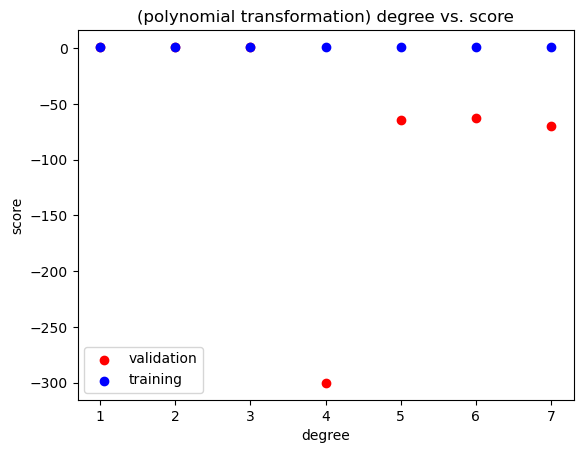

In [25]:
#plot degrees vs. scores

degrees = [str(i) for i in range(1,8)]
plt.scatter(degrees,degree_val,color='r',label='validation',)
plt.scatter(degrees,degree_train,color='b',label='training',)
plt.legend()
plt.title('(polynomial transformation) degree vs. score')
plt.xlabel('degree')
plt.ylabel('score')

Text(0, 0.5, 'score')

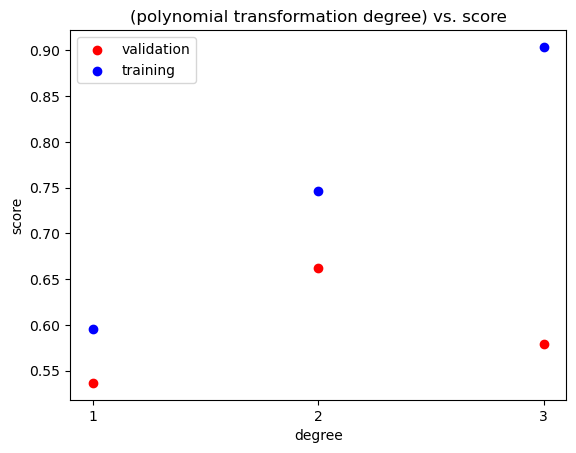

In [24]:
#adjusted plot degrees vs. scores
degrees_p = [str(i) for i in range(1,4)]
plt.scatter(degrees_p,degree_val[0:3],color='r',label='validation',)
plt.scatter(degrees_p,degree_train[0:3],color='b',label='training',)
plt.legend()
plt.title('(polynomial transformation degree) vs. score')
plt.xlabel('degree')
plt.ylabel('score')

In [30]:
# ridge regularization
def ridge(X, y, alpha = 0):
    model = Ridge(alpha = alpha)
    poly = PolynomialFeatures(degree = 2)
    X_train_transformed = poly.fit_transform(X_train)
    model.fit(X_train_transformed, y_train)
    train_score = model.score(X_train_transformed, y_train)
    print('train_score : ', train_score)
    
    X_trans = poly.fit_transform(X)
    y_pred = model.predict(X_trans)
    val_score = model.score(X_trans, y)
    print('val-score: ', val_score)
    return val_score, train_score, [model.intercept_], [model.coef_]

In [31]:
score_train_L2 = []
score_val_L2 = []
coefs_L2 = [] #all weights
inters_L2 = [] #all w0
alpha_s = [0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,1,5,10,20,40,60,75,100]
for a in alpha_s:
    print('----------')
    print('a = ', a)
    val_score, train_score, inter, coef = ridge(X_val, y_val, a)
    score_val_L2.append(val_score)
    score_train_L2.append(train_score)
    coefs_L2.append(coef)
    inters_L2.append(inter)

----------
a =  0.0001
train_score :  0.72617837977951
val-score:  0.6469662928639702
----------
a =  0.0005
train_score :  0.7246566242769441
val-score:  0.650541856716606
----------
a =  0.001
train_score :  0.7238387067556873
val-score:  0.6526790470067324
----------
a =  0.005
train_score :  0.7194537824215596
val-score:  0.6583412970280886
----------
a =  0.01
train_score :  0.7155499176144877
val-score:  0.6612633005770314
----------
a =  0.05
train_score :  0.6976458931716983
val-score:  0.6606714716244417
----------
a =  0.1
train_score :  0.6850428926609189
val-score:  0.6529201065316399
----------
a =  1
train_score :  0.634512285607316
val-score:  0.6009755677291748
----------
a =  5
train_score :  0.6034041765485414
val-score:  0.5596516378031092
----------
a =  10
train_score :  0.5871080984260177
val-score:  0.5421291835558403
----------
a =  20
train_score :  0.5647161592645684
val-score:  0.5231668144627821
----------
a =  40
train_score :  0.5315431765394344
val-score:

In [32]:
# Lasso Regularization
def lasso(X, y, alpha = 0):
    model = Lasso(alpha = alpha, max_iter = 3000)
    poly = PolynomialFeatures(degree = 2)
    X_train_transformed = poly.fit_transform(X_train)
    model.fit(X_train_transformed, y_train)
    train_score = model.score(X_train_transformed, y_train)
    print('train_score : ', train_score)
    
    X_trans = poly.fit_transform(X)
    y_pred = model.predict(X_trans)
    val_score = model.score(X_trans, y)
    print('val-score: ', val_score)
    return val_score, train_score, [model.intercept_], [model.coef_]

In [33]:
score_train_L1 = []
score_val_L1 = []
coefs_L1 = [] #all weights
inters_L1 = [] #all w0
for a in alpha_s:
    print('----------')
    print('a = ', a)
    val_score, train_score, inter, coef = lasso(X_val, y_val, a)
    score_val_L1.append(val_score)
    score_train_L1.append(train_score)
    coefs_L1.append(coef)
    inters_L1.append(inter)

----------
a =  0.0001
train_score :  0.708126579174426
val-score:  0.6660502422355888
----------
a =  0.0005


/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.096e+02, tolerance: 3.503e-01
  model = cd_fast.enet_coordinate_descent(
/Users/waynewang/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.610e+00, tolerance: 3.503e-01
  model = cd_fast.enet_coordinate_descent(


train_score :  0.6579847055415713
val-score:  0.6380841570673366
----------
a =  0.001
train_score :  0.6190231186295794
val-score:  0.5840498902801349
----------
a =  0.005
train_score :  0.5770218065808993
val-score:  0.5288896178114866
----------
a =  0.01
train_score :  0.5410271344145646
val-score:  0.4844579365211198
----------
a =  0.05
train_score :  0.4081644895664194
val-score:  0.39118814030448823
----------
a =  0.1
train_score :  0.19822068081596322
val-score:  0.19835447846194276
----------
a =  1
train_score :  0.0
val-score:  -0.010331369060321727
----------
a =  5
train_score :  0.0
val-score:  -0.010331369060321727
----------
a =  10
train_score :  0.0
val-score:  -0.010331369060321727
----------
a =  20
train_score :  0.0
val-score:  -0.010331369060321727
----------
a =  40
train_score :  0.0
val-score:  -0.010331369060321727
----------
a =  60
train_score :  0.0
val-score:  -0.010331369060321727
----------
a =  75
train_score :  0.0
val-score:  -0.010331369060321727

In [34]:
#put all the w1 in a list, all the w2 in a list, etc.


all_w_l1 = []
for j in range(len(coefs_L1[0][0])):
    all_w_j = []
    for i in range(len(coefs_L1)):
        all_w_j.append(coefs_L1[i][0][j])
    all_w_l1.append(all_w_j)

#put all the w1 in a list, all the w2 in a list, etc.
all_w_l2 = []
for j in range(len(coefs_L2[0][0])):
    all_w_j = []
    for i in range(len(coefs_L2)):
        all_w_j.append(coefs_L2[i][0][j])
    all_w_l2.append(all_w_j)


     

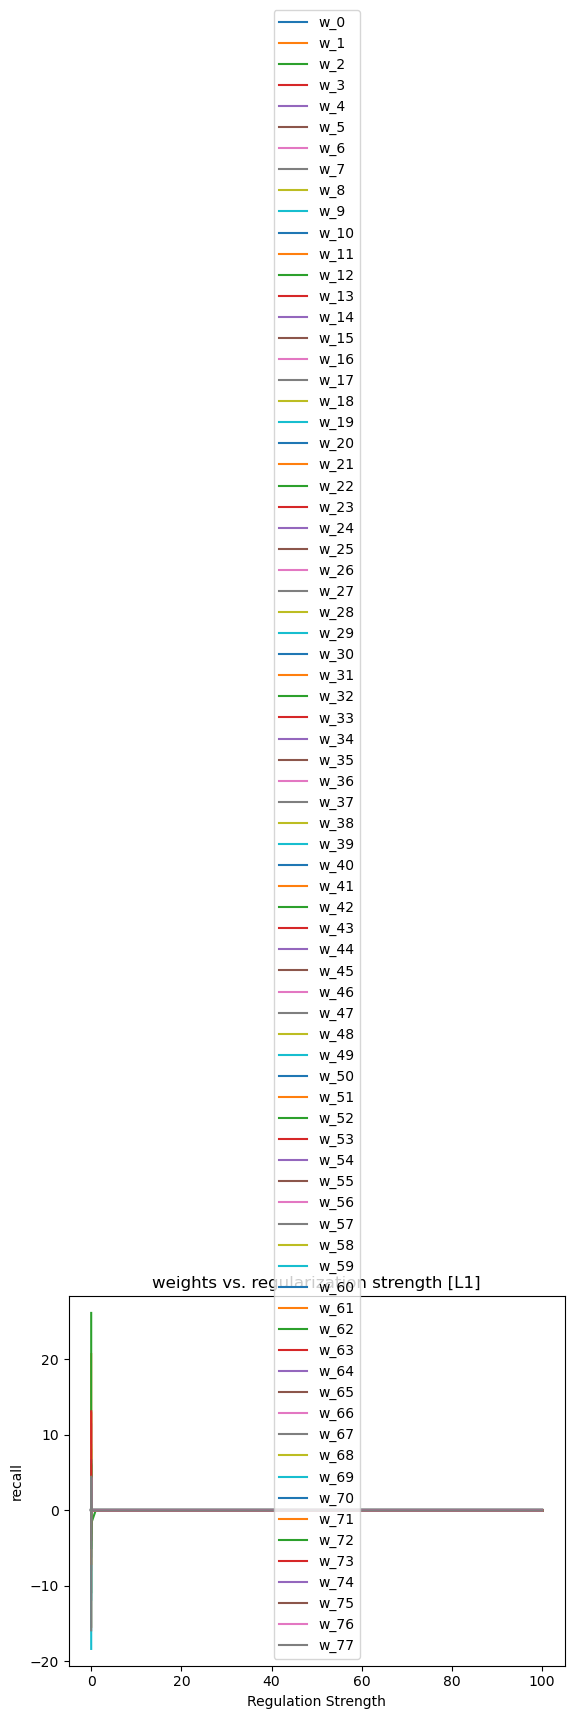

In [41]:

color = iter(cm.rainbow(np.linspace(0, 1, 20000)))
for w in range(len(all_w_l1)):
        c = next(color)
        label_value = 'w_'+''+str(w)
        #plot the change in feature weights with respect to different regulation strength
        plt.plot(alpha_s,all_w_l1[w], label = label_value)
plt.legend()
plt.xlabel("Regulation Strength")
plt.ylabel("recall")
plt.title("weights vs. regularization strength [L1]")
plt.show()

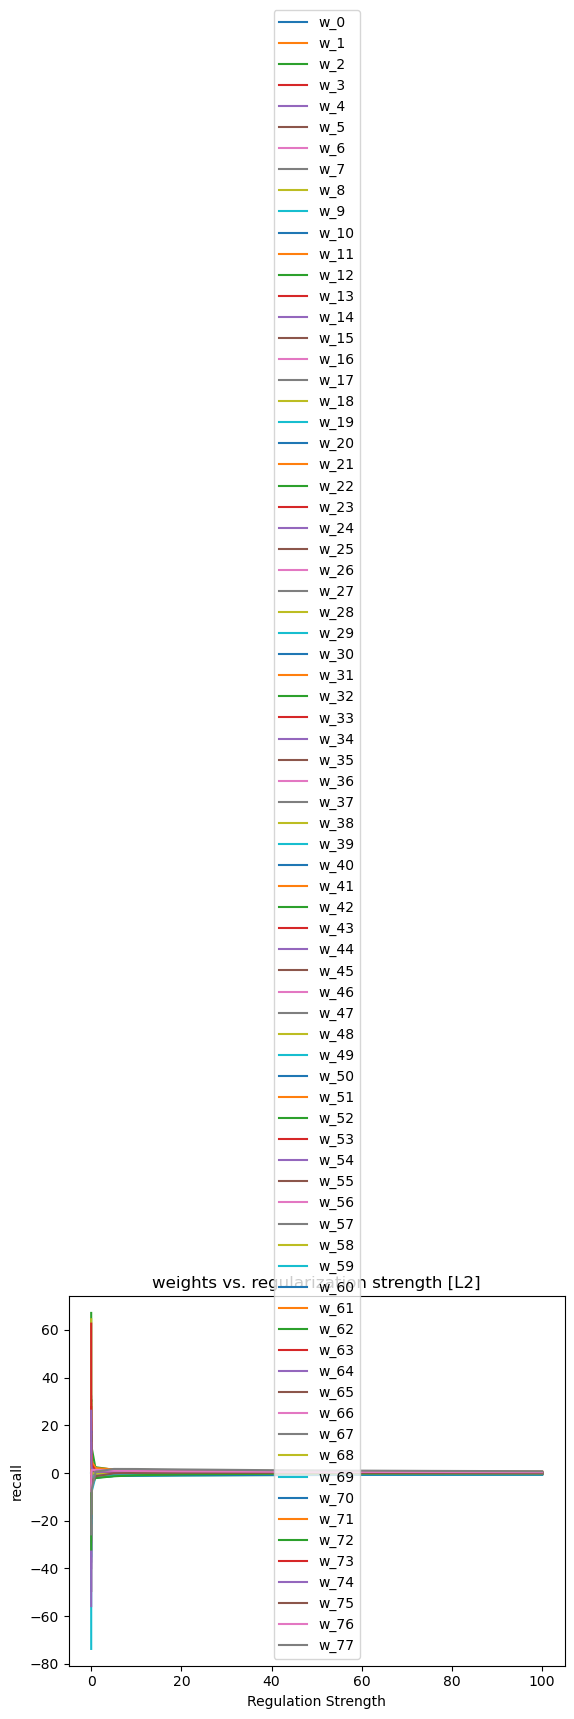

In [40]:
# drawing for L2 weights change
color = iter(cm.rainbow(np.linspace(0, 1, 20000)))
for w in range(len(all_w_l2)):
        c = next(color)
        label_value = 'w_'+''+str(w)
        #plot the change in feature weights with respect to different regulation strength
        plt.plot(alpha_s,all_w_l2[w], label = label_value)
plt.legend()
plt.xlabel("Regulation Strength")
plt.ylabel("recall")
plt.title("weights vs. regularization strength [L2]")
plt.show()

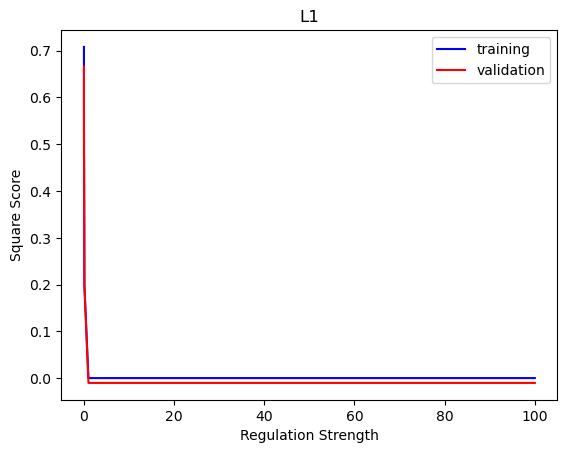

In [20]:
#plot the change in validation and training score with respect to different regulation strength
# L1 regularization
plt.plot( alpha_s,score_train_L1, label = "training",color ='b')
plt.plot(alpha_s,score_val_L1, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("Square Score")
plt.legend()
plt.title("L1")
plt.show()

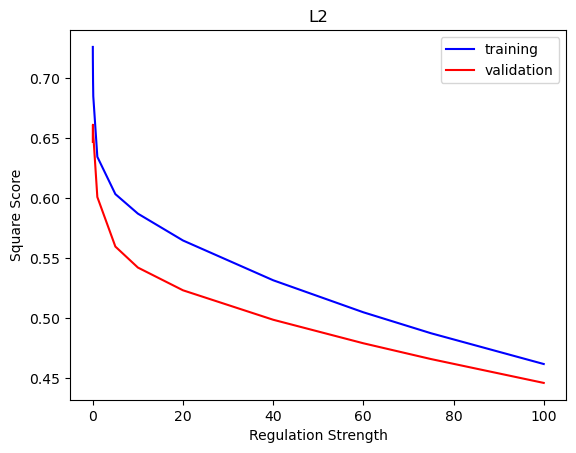

In [21]:
#plot the change in validation and training score with respect to different regulation strength
# L1 regularization
plt.plot( alpha_s,score_train_L2, label = "training",color ='b')
plt.plot(alpha_s,score_val_L2, label = "validation",color = "r")
plt.xlabel("Regulation Strength")
plt.ylabel("Square Score")
plt.legend()
plt.title("L2")
plt.show()

In [43]:
#Test Result
test_score, train_score, inter, coef = ridge(X_test, y_test, 0.0001)



train_score :  0.72617837977951
val-score:  0.6260886676461701


In [46]:
#
print('The test score of linear regression is',test_score)

The test score of linear regression is 0.6260886676461701
